In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import plotly.graph_objects as go


In [ ]:
#Opening datasets for plotting

In [ ]:
housing_data = pd.read_csv('dataset/housing_all.csv')


In [ ]:
#Display data

In [9]:
print(housing_data)


        Unnamed: 0  year  month        town  flat_type storey_range  \
0                0  1990      1  ANG MO KIO     1 ROOM     10 TO 12   
1                1  1990      1  ANG MO KIO     1 ROOM     04 TO 06   
2                2  1990      1  ANG MO KIO     1 ROOM     10 TO 12   
3                3  1990      1  ANG MO KIO     1 ROOM     07 TO 09   
4                4  1990      1  ANG MO KIO     3 ROOM     04 TO 06   
...            ...   ...    ...         ...        ...          ...   
940734      940734  2024     11      YISHUN     5 ROOM     07 TO 09   
940735      940735  2024     11      YISHUN     5 ROOM     10 TO 12   
940736      940736  2024     11      YISHUN     5 ROOM     01 TO 03   
940737      940737  2024     11      YISHUN  EXECUTIVE     04 TO 06   
940738      940738  2024     11      YISHUN  EXECUTIVE     01 TO 03   

        floor_area_sqm      flat_model  lease_commence_date  remaining_lease  \
0                 31.0        IMPROVED                 1977        

In [ ]:
#Describe dataset

In [5]:
housing_data.describe()

,Unnamed: 0,year,month,floor_area_sqm,lease_commence_date,remaining_lease,resale_price,range_numeric
count,940739.00000,940739.000000,940739.000000,940739.000000,940739.000000,940739.000000,9.407390e+05,940739.000000
mean,470369.00000,2006.425917,6.576067,95.686183,1988.418313,80.973216,3.251278e+05,7.704593
std,271568.10178,9.494460,3.400737,25.802357,10.805266,10.846909,1.745527e+05,4.840640
min,0.00000,1990.000000,1.000000,28.000000,1966.000000,41.000000,5.000000e+03,2.000000
25%,235184.50000,1999.000000,4.000000,73.000000,1981.000000,74.000000,1.950000e+05,5.000000
50%,470369.00000,2005.000000,7.000000,93.000000,1986.000000,83.000000,3.000000e+05,8.000000
75%,705553.50000,2014.000000,10.000000,113.000000,1996.000000,90.000000,4.210000e+05,11.000000
max,940738.00000,2024.000000,12.000000,366.700000,2021.000000,101.000000,1.588000e+06,50.000000


In [ ]:
#Display data information

In [10]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940739 entries, 0 to 940738
Data columns (total 13 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Unnamed: 0           940739 non-null  int64  
 1   year                 940739 non-null  int64  
 2   month                940739 non-null  int64  
 3   town                 940739 non-null  object 
 4   flat_type            940739 non-null  object 
 5   storey_range         940739 non-null  object 
 6   floor_area_sqm       940739 non-null  float64
 7   flat_model           940739 non-null  object 
 8   lease_commence_date  940739 non-null  int64  
 9   remaining_lease      940739 non-null  int64  
 10  resale_price         940739 non-null  float64
 11  district             940739 non-null  object 
 12  range_numeric        940739 non-null  float64
dtypes: float64(3), int64(5), object(5)
memory usage: 93.3+ MB


In [ ]:
#listing data columns

In [11]:
housing_data.columns


Index(['Unnamed: 0', 'year', 'month', 'town', 'flat_type', 'storey_range',
       'floor_area_sqm', 'flat_model', 'lease_commence_date',
       'remaining_lease', 'resale_price', 'district', 'range_numeric'],
      dtype='object')

In [7]:
housing_data.dtypes

year                     int64
month                    int64
town                    object
flat_type               object
storey_range            object
floor_area_sqm         float64
flat_model              object
lease_commence_date      int64
remaining_lease          int64
resale_price           float64
dtype: object

In [ ]:
#Checking for Null values

In [8]:
housing_data.isnull().sum()

year                   0
month                  0
town                   0
flat_type              0
storey_range           0
floor_area_sqm         0
flat_model             0
lease_commence_date    0
remaining_lease        0
resale_price           0
dtype: int64

In [9]:
housing_data.shape


(940739, 10)

In [25]:

# Split the range into start and end, then compute the midpoint
housing_data[['start', 'end']] = housing_data['storey_range'].str.split(' TO ', expand=True).astype(int)
housing_data['range_numeric'] = (housing_data['start'] + housing_data['end']) / 2  # Compute midpoint

# Drop the auxiliary columns
housing_data.drop(columns=['start', 'end'], inplace=True)
print(housing_data['range_numeric'].unique())
# Convert a specific column to uppercase
housing_data['flat_model'] = housing_data['flat_model'].str.upper()

housing_data.to_csv('housing_all.csv')

[11.  5.  8.  2. 14. 20. 17. 26. 23. 29. 32. 41. 38. 35.  3. 13. 18. 28.
 33. 47. 44. 50.]


In [ ]:
#Displaying distribution of Resale Price 

c:\Users\firas\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


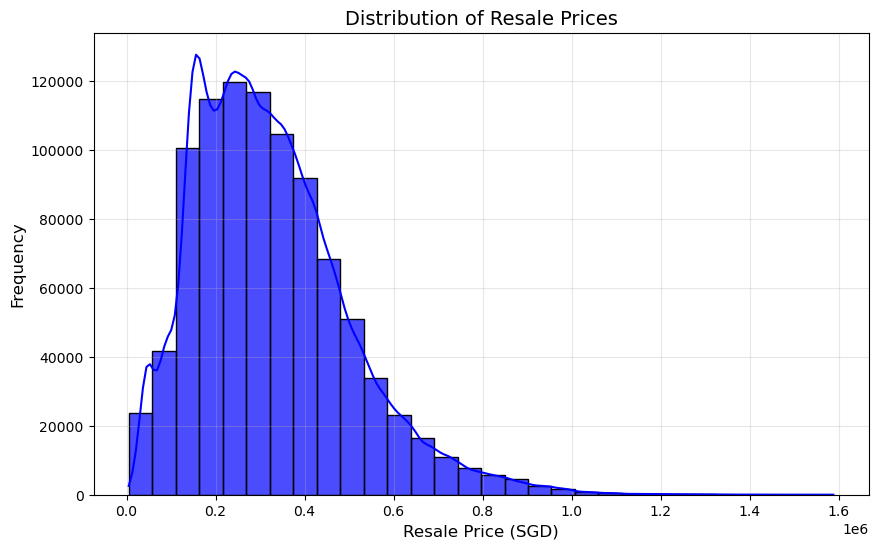

In [9]:

# Plot distribution for 'resale_price'
plt.figure(figsize=(10, 6))
sns.histplot(housing_data['resale_price'], kde=True, bins=30, color='blue', alpha=0.7)

# Add labels and title
plt.title('Distribution of Resale Prices', fontsize=14)
plt.xlabel('Resale Price (SGD)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(alpha=0.3)

# Show plot
plt.show()


In [ ]:
#Distribution of Resale Transactions by flat_type

c:\Users\firas\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


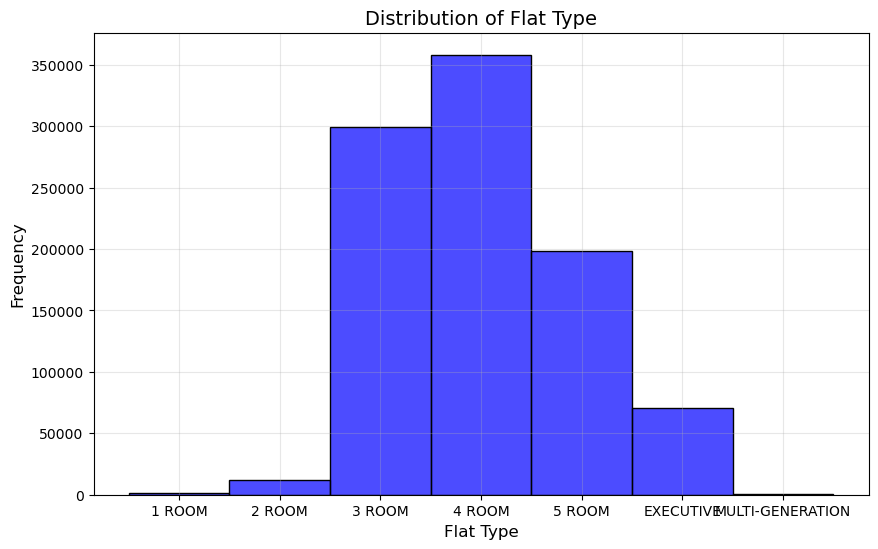

In [13]:

# Convert 'flat_type' to a categorical type with a specified order
flat_type_order = ['1 ROOM', '2 ROOM', '3 ROOM', '4 ROOM', '5 ROOM', 'EXECUTIVE', 'MULTI-GENERATION']
housing_data['flat_type'] = pd.Categorical(housing_data['flat_type'], categories=flat_type_order, ordered=True)

# Sort the DataFrame based on the new categorical order
housing_data = housing_data.sort_values(by='flat_type')

# Plot the distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=housing_data, x='flat_type', color='blue', alpha=0.7)

# Add labels and title
plt.title('Distribution of Flat Type', fontsize=14)
plt.xlabel('Flat Type', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(alpha=0.3)

# Show plot
plt.show()


In [ ]:
#Distribution of Resale Transactions by HDB Towns

c:\Users\firas\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


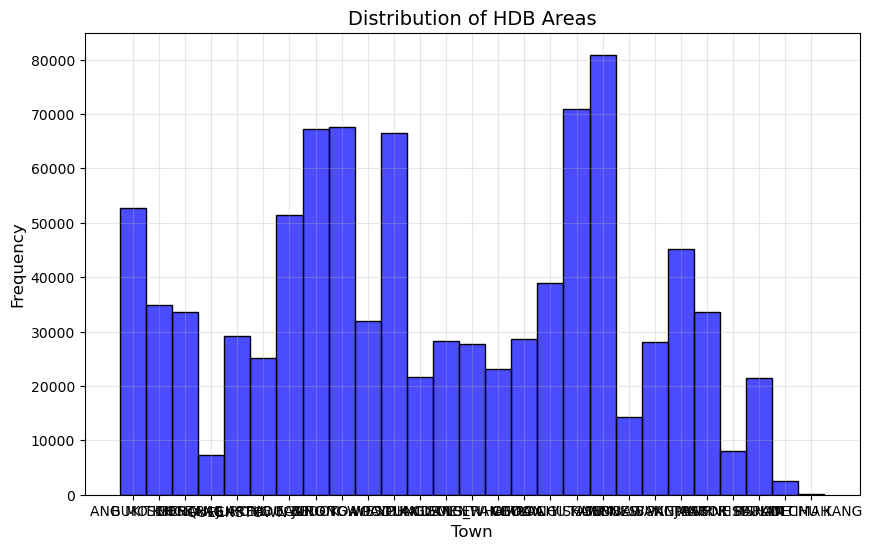

In [14]:

# Plot distribution for 'resale_price'
plt.figure(figsize=(10, 6))
sns.histplot(housing_data['town'], bins=30, color='blue', alpha=0.7)

# Add labels and title
plt.title('Distribution of HDB Areas', fontsize=14)
plt.xlabel('Town', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(alpha=0.3)

# Show plot
plt.show()

In [ ]:
#Distribution of Resale Transactions by Districts

c:\Users\firas\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


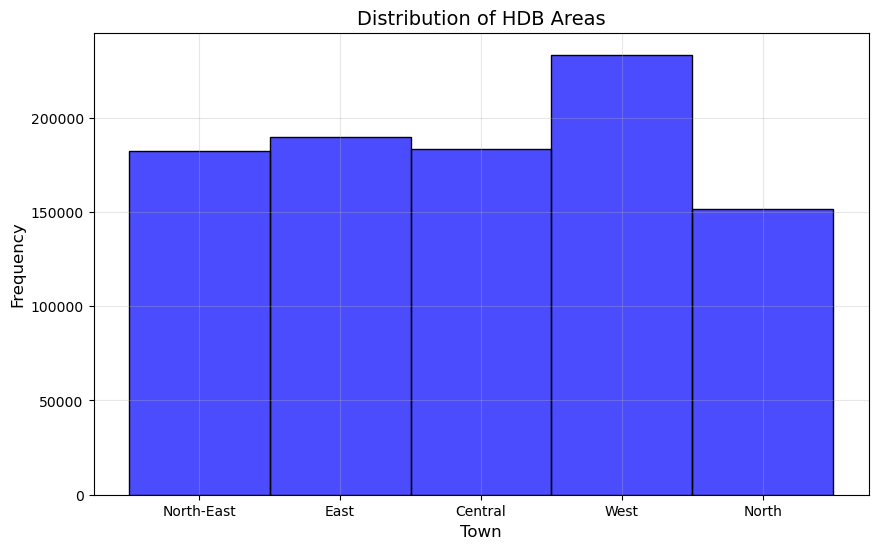

In [23]:

# Plot distribution for 'resale_price'
plt.figure(figsize=(10, 6))
sns.histplot(housing_data['district'], bins=30, color='blue', alpha=0.7)

# Add labels and title
plt.title('Distribution of HDB Areas', fontsize=14)
plt.xlabel('Town', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(alpha=0.3)

# Show plot
plt.show()

In [ ]:
#Distribution of Resale Transactions by flat_model

c:\Users\firas\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


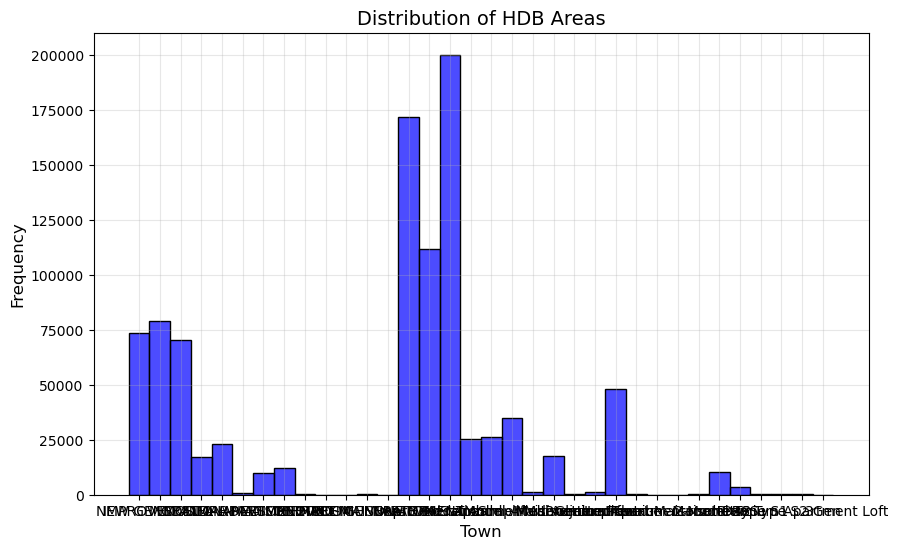

In [22]:

# Plot distribution for 'resale_price'
plt.figure(figsize=(10, 6))
sns.histplot(housing_data['flat_model'], bins=30, color='blue', alpha=0.7)

# Add labels and title
plt.title('Distribution of HDB Areas', fontsize=14)
plt.xlabel('Town', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(alpha=0.3)

# Show plot
plt.show()

In [ ]:
#Box Plot of Resale Price by towns

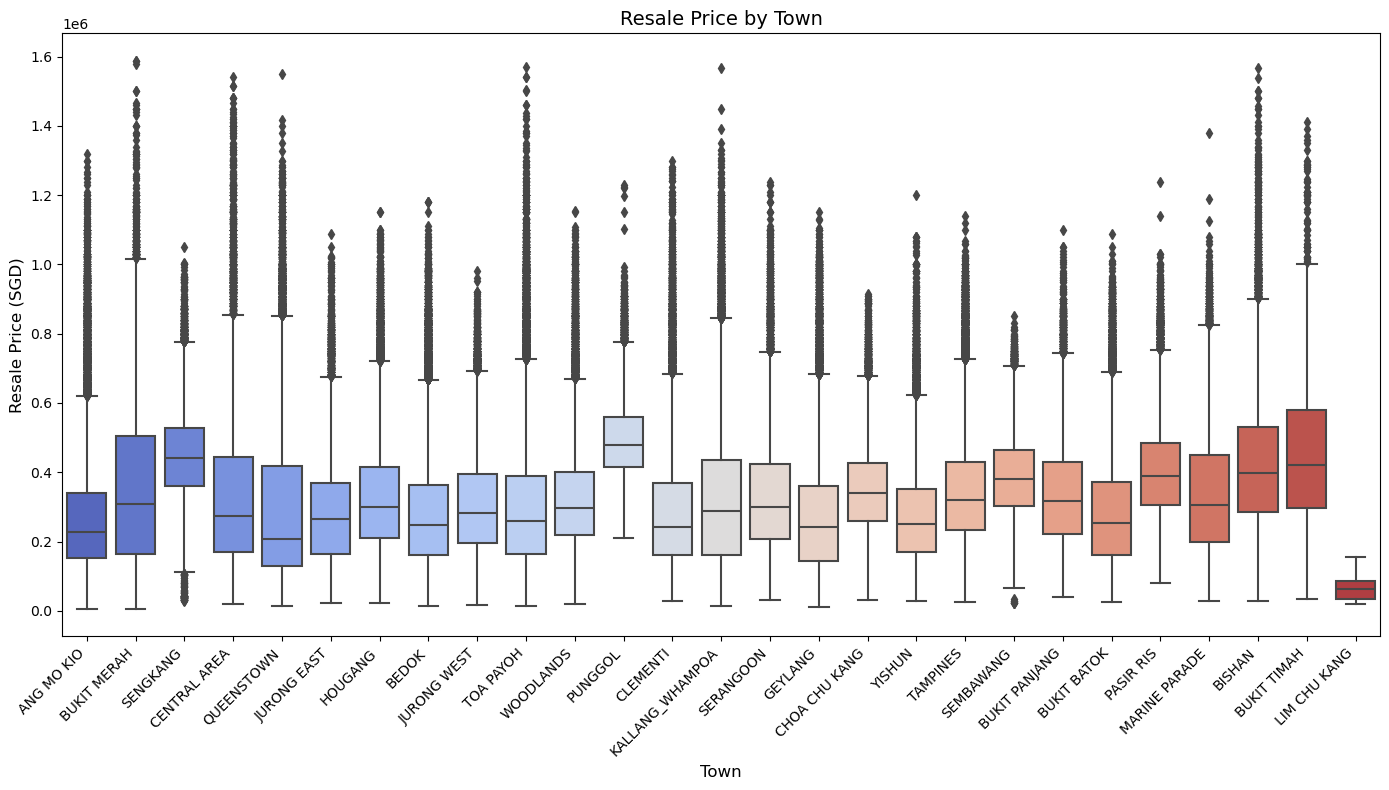

In [15]:
# Set the figure size
plt.figure(figsize=(14, 8))

# Create the box plot
sns.boxplot(data=housing_data, x='town', y='resale_price', palette='coolwarm')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add labels and title
plt.title('Resale Price by Town', fontsize=14)
plt.xlabel('Town', fontsize=12)
plt.ylabel('Resale Price (SGD)', fontsize=12)

# Show plot
plt.tight_layout()
plt.show()


In [ ]:
#Box Plot of Resale Price by District

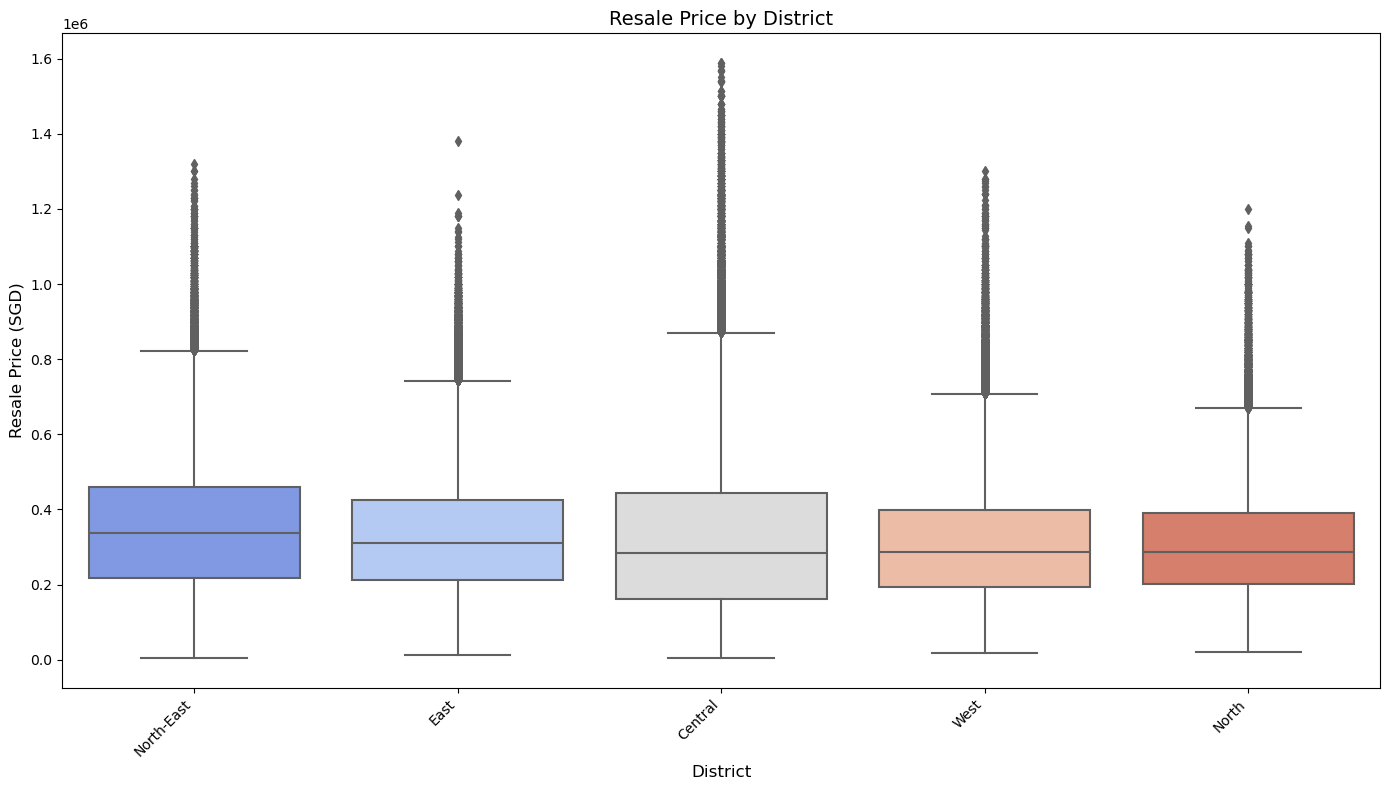

In [24]:
# Set the figure size
plt.figure(figsize=(14, 8))

# Create the box plot
sns.boxplot(data=housing_data, x='district', y='resale_price', palette='coolwarm')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add labels and title
plt.title('Resale Price by District', fontsize=14)
plt.xlabel('District', fontsize=12)
plt.ylabel('Resale Price (SGD)', fontsize=12)

# Show plot
plt.tight_layout()
plt.show()


In [ ]:
#Box Plot of Resale Price by flat_type

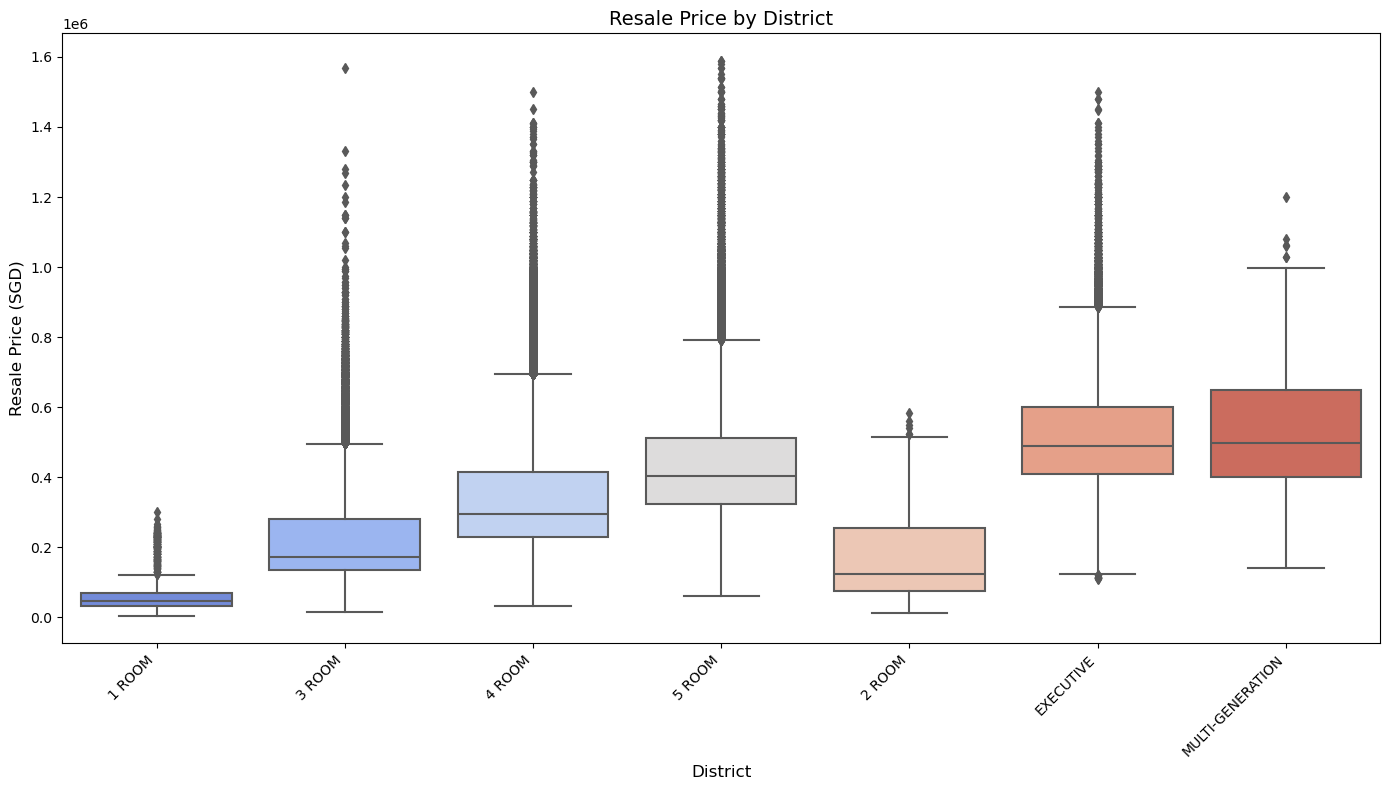

In [4]:
# Set the figure size
plt.figure(figsize=(14, 8))

# Create the box plot
sns.boxplot(data=housing_data, x='flat_type', y='resale_price', palette='coolwarm')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add labels and title
plt.title('Resale Price by District', fontsize=14)
plt.xlabel('District', fontsize=12)
plt.ylabel('Resale Price (SGD)', fontsize=12)

# Show plot
plt.tight_layout()
plt.show()


In [ ]:
#Box Plot of Resale Price by flat_model

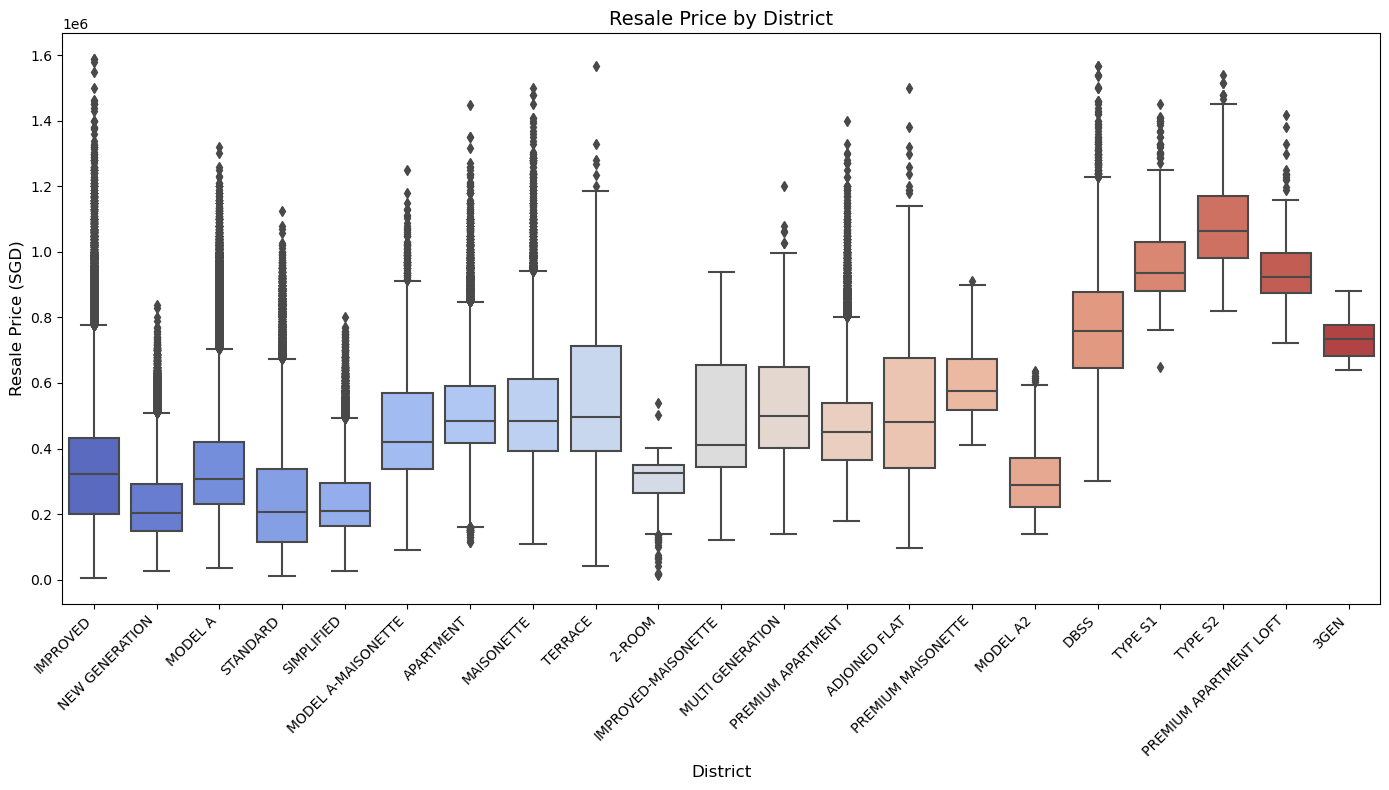

In [26]:
# Set the figure size
plt.figure(figsize=(14, 8))

# Create the box plot
sns.boxplot(data=housing_data, x='flat_model', y='resale_price', palette='coolwarm')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add labels and title
plt.title('Resale Price by District', fontsize=14)
plt.xlabel('District', fontsize=12)
plt.ylabel('Resale Price (SGD)', fontsize=12)

# Show plot
plt.tight_layout()
plt.show()

In [ ]:
#Yearly trend of Housing Price with Gradient

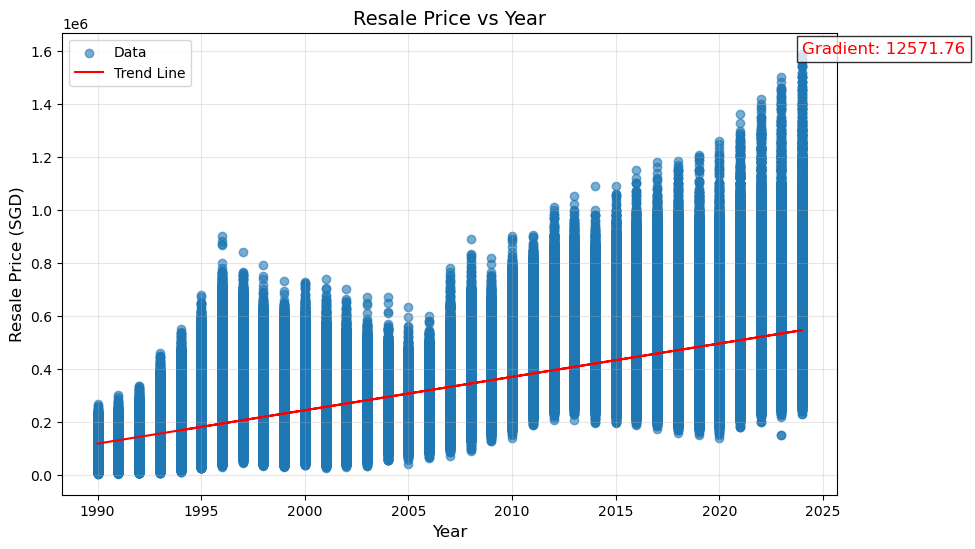

In [21]:

# Extract data
x = housing_data['year']
y = housing_data['resale_price']

# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(x, y, alpha=0.6, label='Data')

# Add trend line using Numpy for linear fit
z = np.polyfit(x, y, 1)  # Linear regression (degree 1)
p = np.poly1d(z)
plt.plot(x, p(x), color='red', label='Trend Line')
# Calculate the gradient as a percentage
slope = z[0]
percent_gradient = (slope / y.mean()) * 100

# Annotate the plot with the gradient as percentage
plt.text(x.max(), y.max(), f'Gradient: {slope:.2f} ({percent_gradient:.2f}%)', 
         fontsize=12, color='red', bbox=dict(facecolor='white', alpha=0.8))
# Add labels and title
plt.title('Resale Price vs Year', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Resale Price (SGD)', fontsize=12)
plt.legend()
plt.grid(alpha=0.3)

# Show plot
plt.show()


In [ ]:
#Yearly trend of Housing Price with Gradient by flat_type

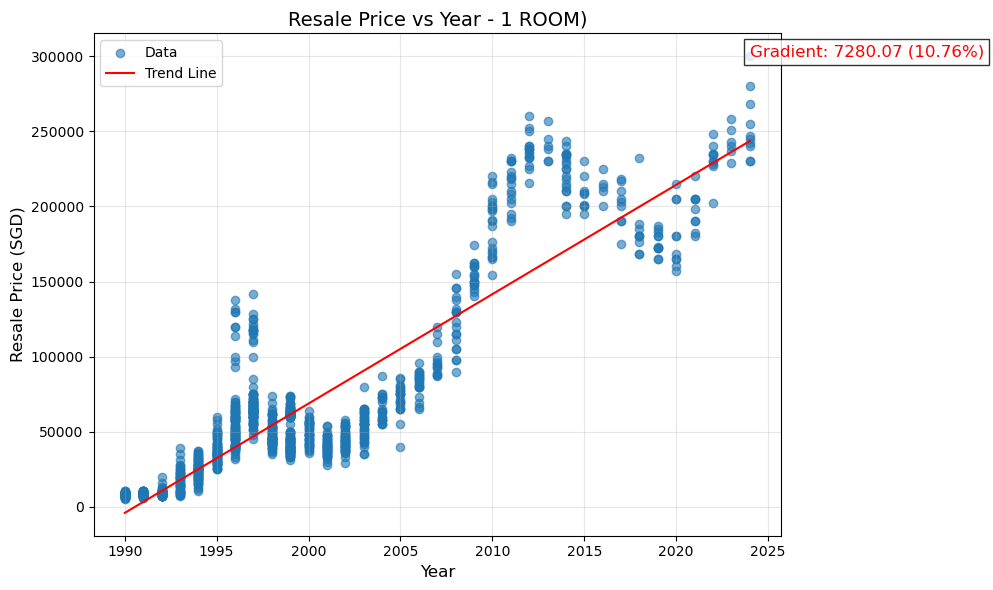

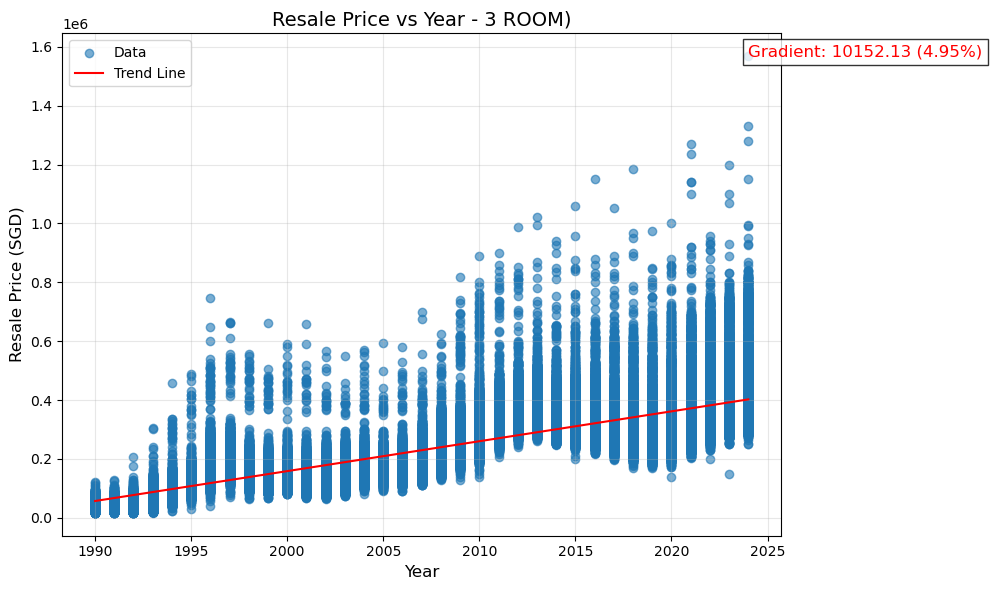

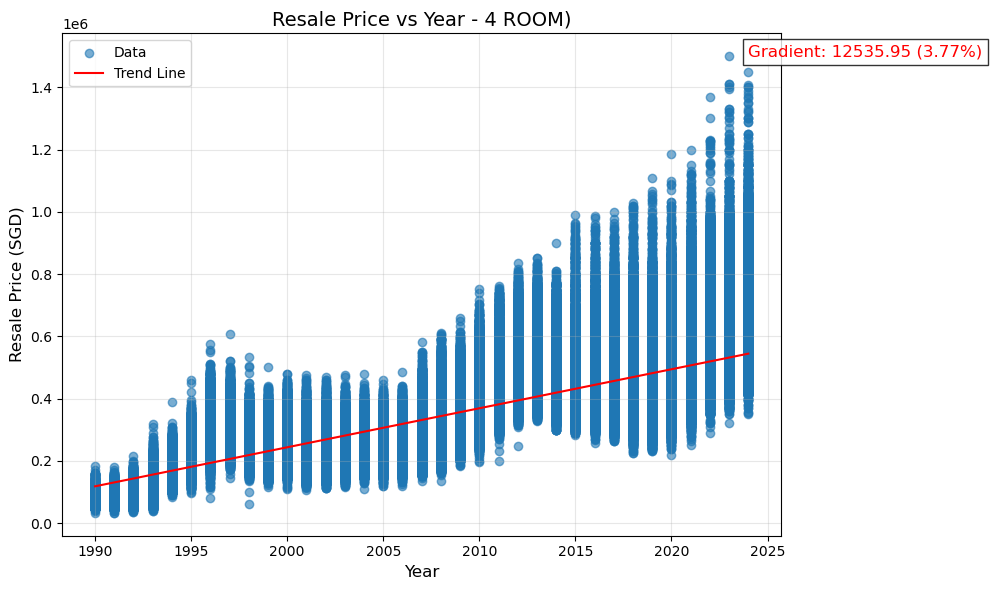

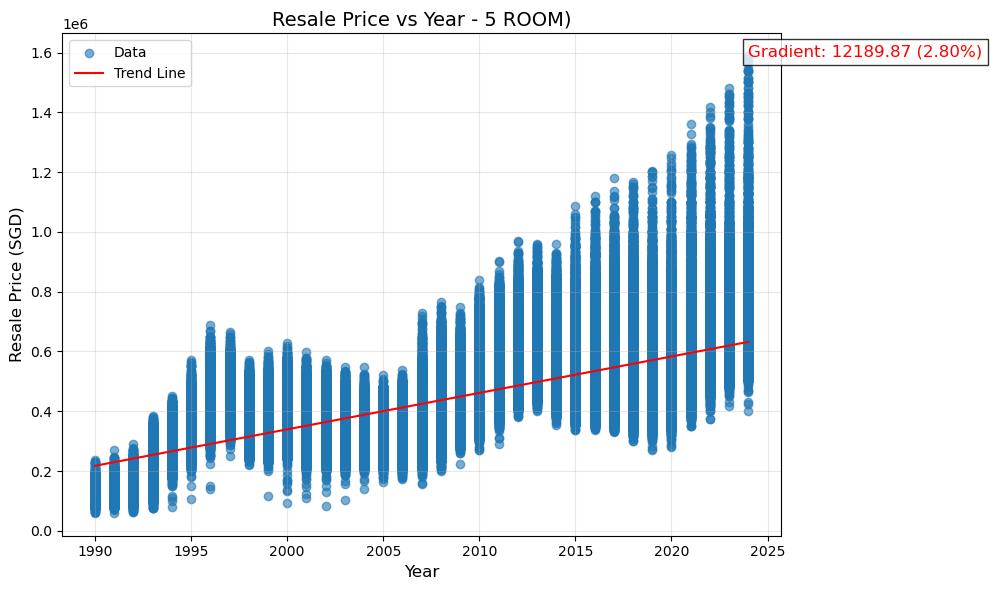

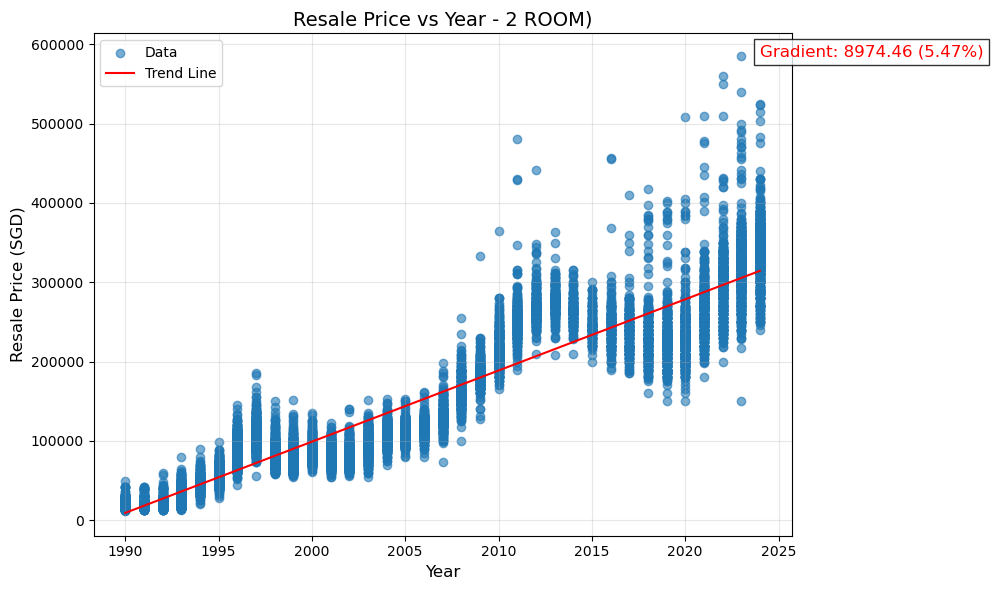

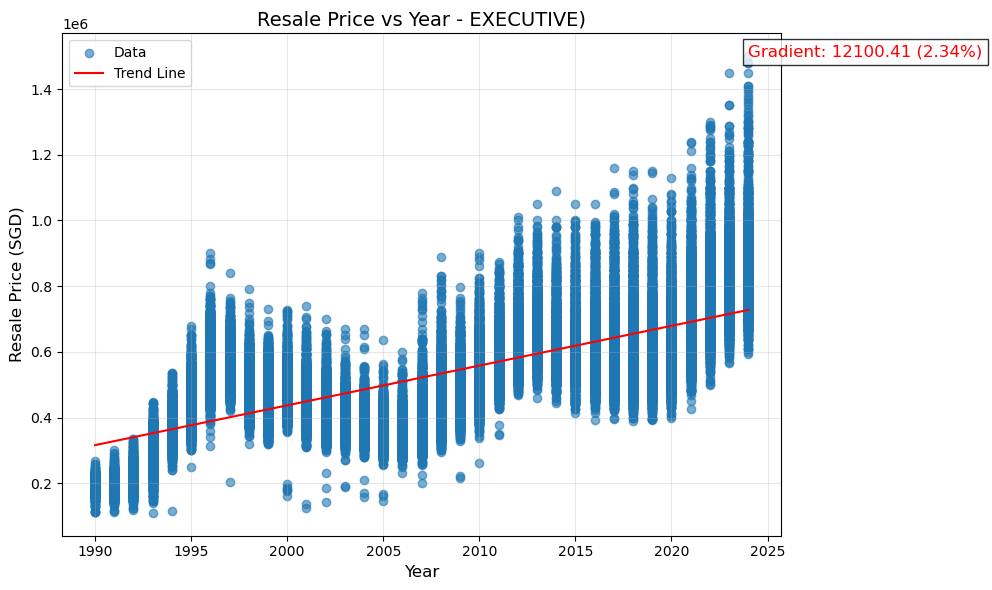

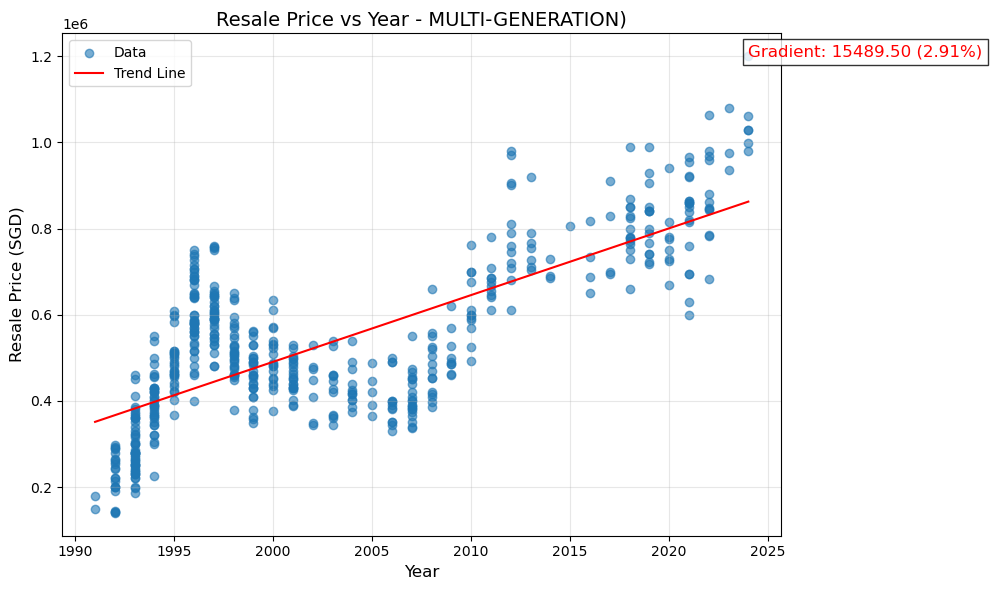

In [38]:
for flat_type in housing_data['flat_type'].unique():
    # Filter data for the current flat type
    flat_data = housing_data[housing_data['flat_type'] == flat_type]

    # Extract data
    x = flat_data['year']
    y = flat_data['resale_price']

    # Skip empty data
    if x.empty or y.empty:
        continue

    # Scatter plot
    plt.figure(figsize=(10, 6))
    plt.scatter(x, y, alpha=0.6, label='Data')

    # Add trend line using Numpy for linear fit
    z = np.polyfit(x, y, 1)  # Linear regression (degree 1)
    p = np.poly1d(z)
    plt.plot(x, p(x), color='red', label='Trend Line')
    # Extract and display the gradient (slope)
    # Calculate the gradient as a percentage
    slope = z[0]
    percent_gradient = (slope / y.mean()) * 100

    # Annotate the plot with the gradient as percentage
    plt.text(x.max(), y.max(), f'Gradient: {slope:.2f} ({percent_gradient:.2f}%)', 
            fontsize=12, color='red', bbox=dict(facecolor='white', alpha=0.8))

    # Add labels and title
    plt.title(f'Resale Price vs Year - {flat_type})', fontsize=14)
    plt.xlabel('Year', fontsize=12)
    plt.ylabel('Resale Price (SGD)', fontsize=12)
    plt.legend()
    plt.grid(alpha=0.3)

    # Show plot
    plt.tight_layout()
    plt.show()

In [ ]:
#Correlation Matrix Plot

Correlation Matrix:
                     range_numeric  remaining_lease  lease_commence_date  \
range_numeric             1.000000         0.078405             0.176145   
remaining_lease           0.078405         1.000000             0.613876   
lease_commence_date       0.176145         0.613876             1.000000   
floor_area_sqm            0.041466         0.321539             0.376138   
resale_price              0.250472        -0.059736             0.542019   

                     floor_area_sqm  resale_price  
range_numeric              0.041466      0.250472  
remaining_lease            0.321539     -0.059736  
lease_commence_date        0.376138      0.542019  
floor_area_sqm             1.000000      0.551319  
resale_price               0.551319      1.000000  


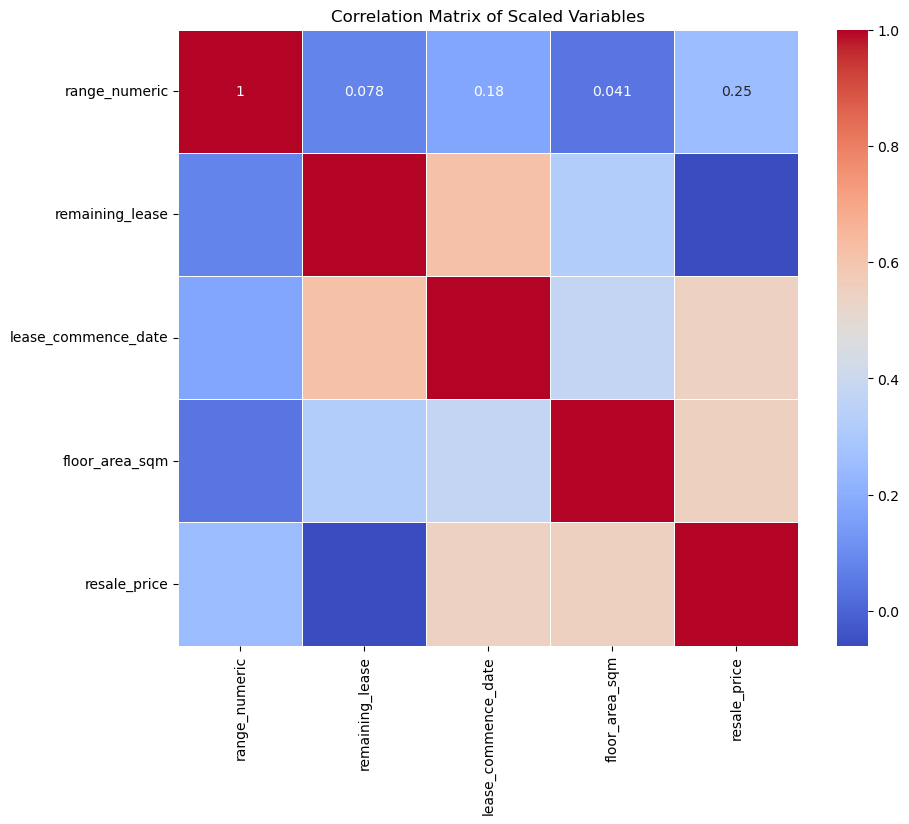

In [31]:
# Select relevant columns for correlation
selected_columns = ['range_numeric', 'remaining_lease','lease_commence_date' ,'floor_area_sqm', 'resale_price']

# Scale the data by the median of 'resale_price'
scaled_data = housing_data[selected_columns].copy()
resale_price_median = housing_data['resale_price'].median()
scaled_data = scaled_data / resale_price_median

# Compute the correlation matrix for scaled data
correlation_matrix = scaled_data.corr()

# Print the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Scaled Variables')
plt.show()



In [ ]:
#Scatter Plot of Resale Price Agaisnt Floor Area by Flat Type

c:\Users\firas\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


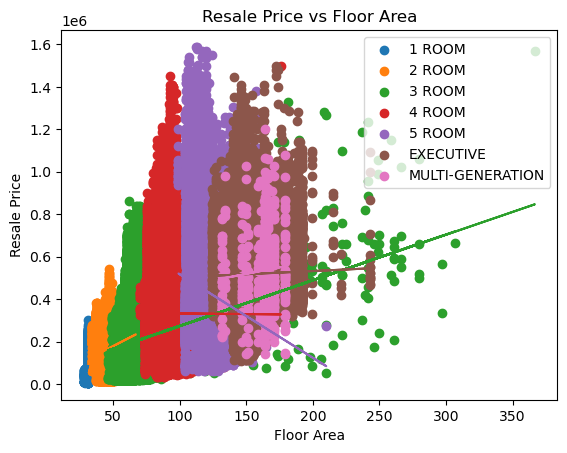

In [6]:
grouped_data = housing_data.groupby('flat_type')['resale_price'].median()
categories = grouped_data.index.tolist()
fig, ax = plt.subplots()
for category in categories:
    x = housing_data[housing_data['flat_type'] == category]['floor_area_sqm']
    y = housing_data[housing_data['flat_type'] == category]['resale_price']
    ax.scatter(x, y, label=category)
    z = np.polyfit(x.astype(int), y, 1)
    p = np.poly1d(z)
    ax.plot(x, p(x.astype(int)))
ax.set_title('Resale Price vs Floor Area')
ax.set_xlabel('Floor Area')
ax.set_ylabel('Resale Price')
ax.legend()
plt.show()

In [ ]:
#Scatter Plot of Resale Price Agaisnt Floor Area with gradient

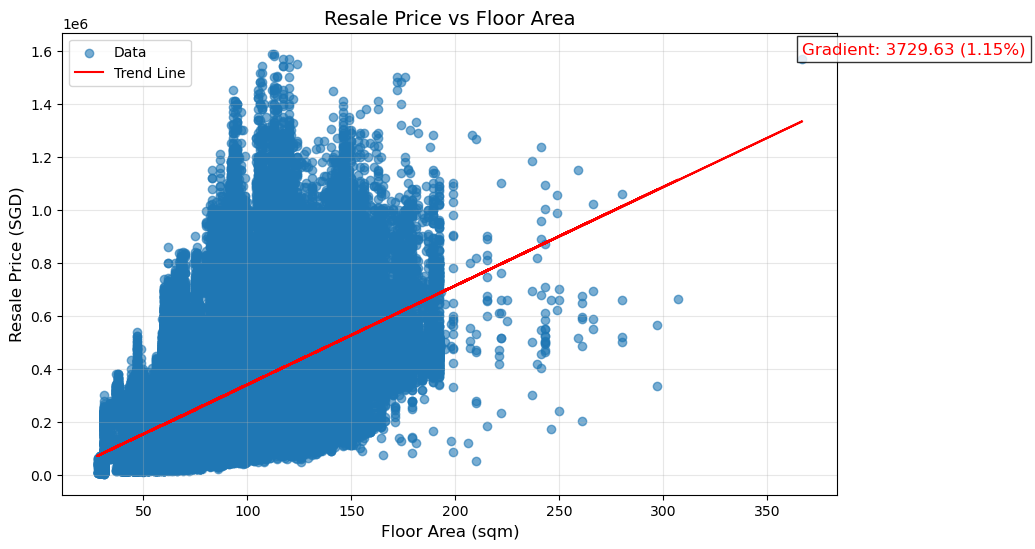

In [37]:
# Extract the data
x = housing_data['floor_area_sqm']
y = housing_data['resale_price']

# Initialize the figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Scatter plot for all data
ax.scatter(x, y, alpha=0.6, label='Data')

# Add a trend line using linear regression
z = np.polyfit(x.astype(int), y, 1)  # Degree 1 for linear fit
p = np.poly1d(z)
ax.plot(x, p(x.astype(int)), color='red', label='Trend Line')
# Calculate the gradient as a percentage
slope = z[0]
percent_gradient = (slope / y.mean()) * 100

# Annotate the plot with the gradient as percentage
plt.text(x.max(), y.max(), f'Gradient: {slope:.2f} ({percent_gradient:.2f}%)', 
         fontsize=12, color='red', bbox=dict(facecolor='white', alpha=0.8))

# Add labels and title
ax.set_title('Resale Price vs Floor Area', fontsize=14)
ax.set_xlabel('Floor Area (sqm)', fontsize=12)
ax.set_ylabel('Resale Price (SGD)', fontsize=12)
ax.legend(fontsize=10)
plt.grid(alpha=0.3)

# Show the plot
plt.show()


In [ ]:
#Median Resale Price against floor number with Gradient

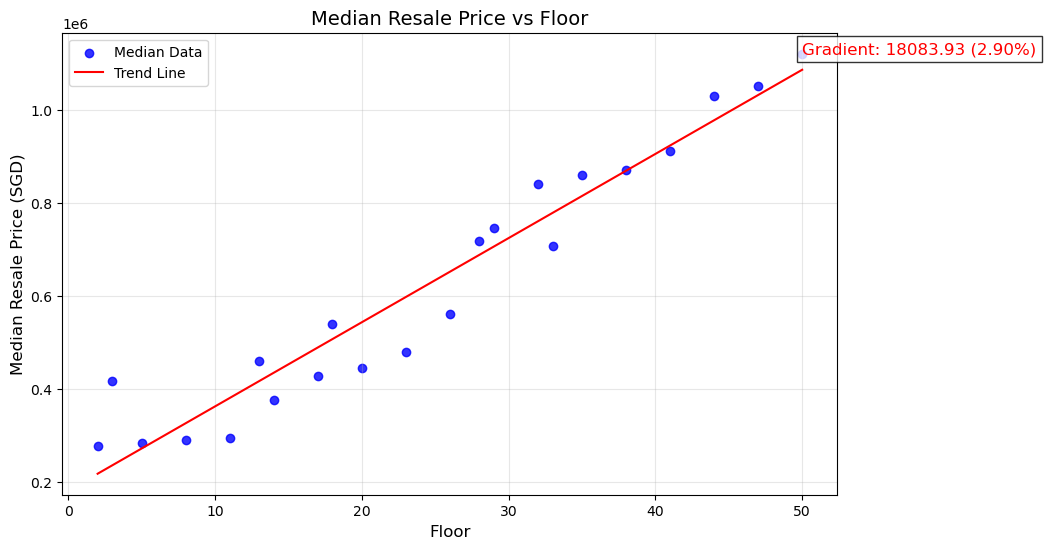

In [67]:


# Calculate the median resale price for each range_numeric
median_prices = housing_data.groupby('range_numeric')['resale_price'].median()

# Extract the data for plotting
x = median_prices.index  # range_numeric values
y = median_prices.values  # Median resale prices

# Initialize the figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Scatter plot for median data
ax.scatter(x, y, alpha=0.8, color='blue', label='Median Data')

# Add a trend line using linear regression
z = np.polyfit(x, y, 1)  # Degree 1 for linear fit
p = np.poly1d(z)
ax.plot(x, p(x), color='red', label='Trend Line')
# Calculate the gradient as a percentage
slope = z[0]
percent_gradient = (slope / y.mean()) * 100

# Annotate the plot with the gradient as percentage
plt.text(x.max(), y.max(), f'Gradient: {slope:.2f} ({percent_gradient:.2f}%)', 
         fontsize=12, color='red', bbox=dict(facecolor='white', alpha=0.8))

# Add labels and title
ax.set_title('Median Resale Price vs Floor', fontsize=14)
ax.set_xlabel('Floor', fontsize=12)
ax.set_ylabel('Median Resale Price (SGD)', fontsize=12)
ax.legend(fontsize=10)
plt.grid(alpha=0.3)

# Show the plot
plt.show()



C:\Users\firas\AppData\Local\Temp\ipykernel_21600\939495130.py:8: RankWarning: Polyfit may be poorly conditioned
  z = np.polyfit(x.astype(int), y, 1)
C:\Users\firas\AppData\Local\Temp\ipykernel_21600\939495130.py:8: RankWarning: Polyfit may be poorly conditioned
  z = np.polyfit(x.astype(int), y, 1)
C:\Users\firas\AppData\Local\Temp\ipykernel_21600\939495130.py:8: RankWarning: Polyfit may be poorly conditioned
  z = np.polyfit(x.astype(int), y, 1)
C:\Users\firas\AppData\Local\Temp\ipykernel_21600\939495130.py:8: RankWarning: Polyfit may be poorly conditioned
  z = np.polyfit(x.astype(int), y, 1)
C:\Users\firas\AppData\Local\Temp\ipykernel_21600\939495130.py:8: RankWarning: Polyfit may be poorly conditioned
  z = np.polyfit(x.astype(int), y, 1)
c:\Users\firas\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


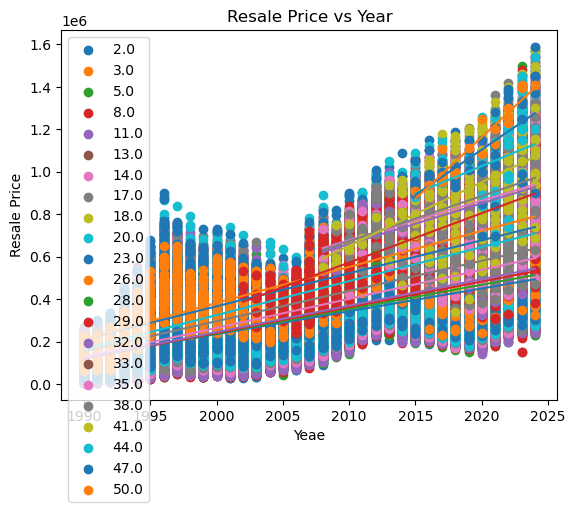

In [68]:
grouped_data = housing_data.groupby('range_numeric')['resale_price'].median()
categories = grouped_data.index.tolist()
fig, ax = plt.subplots()
for category in categories:
    x = housing_data[housing_data['range_numeric'] == category]['year']
    y = housing_data[housing_data['range_numeric'] == category]['resale_price']
    ax.scatter(x, y, label=category)
    z = np.polyfit(x.astype(int), y, 1)
    p = np.poly1d(z)
    ax.plot(x, p(x.astype(int)))
ax.set_title('Resale Price vs Year')
ax.set_xlabel('Year')
ax.set_ylabel('Resale Price')
ax.legend()
plt.show()

In [ ]:
#Resale Price against Reamaing Lease by flat_type

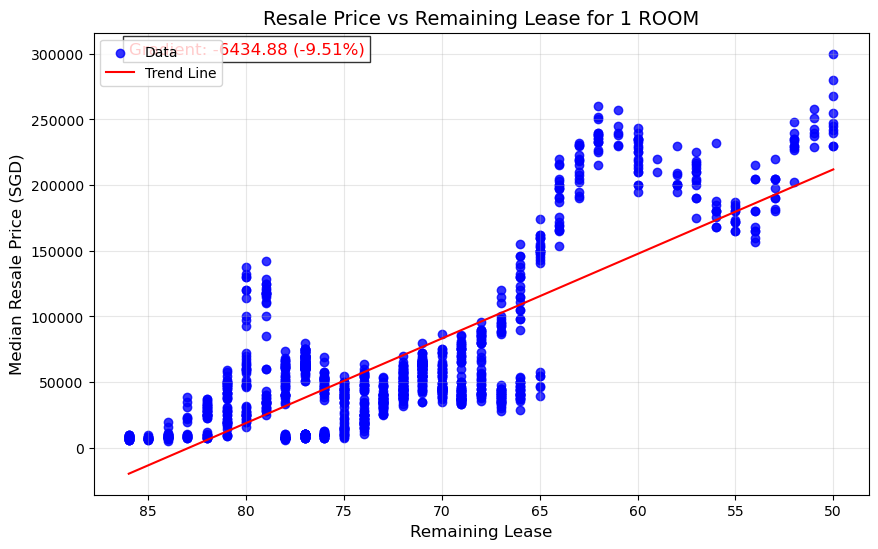

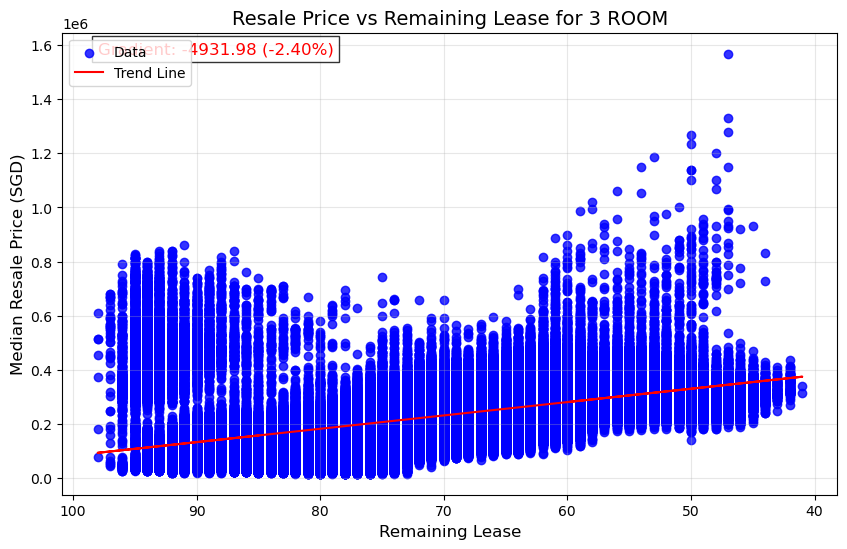

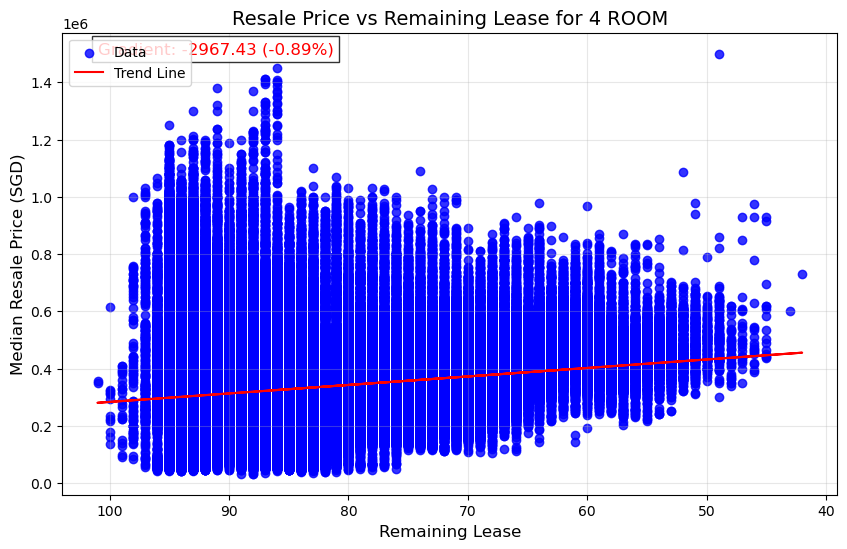

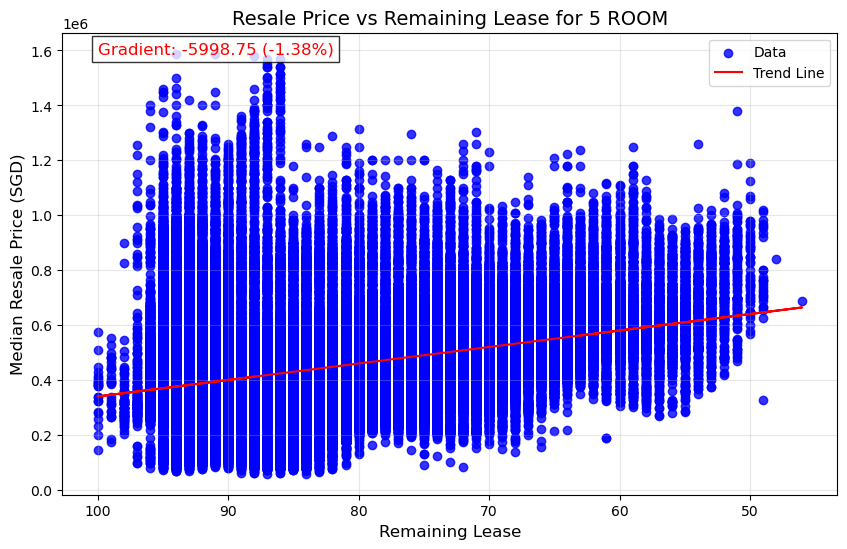

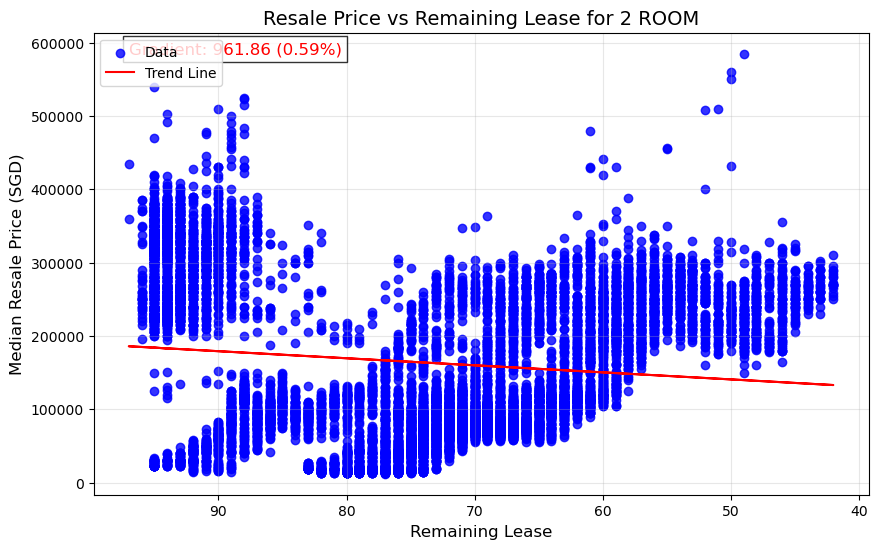

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as seaborn
import streamlit as st
import tensorflow as tf

# Read the CSV file
housing_new = pd.read_csv('housing_new.csv')

# Display the unique values in the 'flat_type' column
unique_flat_types = housing_new['flat_type'].unique()

# Create a separate scatter plot for each flat_type
for flat_type in unique_flat_types:
    # Filter the DataFrame for the current flat_type
    df = housing_new[housing_new['flat_type'] == flat_type]
    
    # Initialize the figure and axes
    fig, ax = plt.subplots(figsize=(10, 6))
    
    # Scatter plot for the current flat_type
    ax.scatter(df['remaining_lease'], df['resale_price'], alpha=0.8, color='blue', label='Data')
    
    # Add a trend line using linear regression
    z = np.polyfit(df['remaining_lease'], df['resale_price'], 1)  # Degree 1 for linear fit
    p = np.poly1d(z)
    ax.plot(df['remaining_lease'], p(df['remaining_lease']), color='red', label='Trend Line')
    
    # Calculate the gradient as a percentage
    slope = z[0]
    percent_gradient = (slope / df['resale_price'].mean()) * 100
    
    # Annotate the plot with the gradient as percentage
    plt.text(df['remaining_lease'].max(), df['resale_price'].max(), f'Gradient: {slope:.2f} ({percent_gradient:.2f}%)',
             fontsize=12, color='red', bbox=dict(facecolor='white', alpha=0.8))
    
    # Add labels and title
    ax.set_title(f'Resale Price vs Remaining Lease for {flat_type}', fontsize=14)
    ax.set_xlabel('Remaining Lease', fontsize=12)
    ax.set_ylabel('Median Resale Price (SGD)', fontsize=12)
    ax.legend(fontsize=10)
    plt.grid(alpha=0.3)
    plt.gca().invert_xaxis()
    # Show the plot
    plt.show()

In [ ]:
#Median Resale Price against Lease_commence_date with Gradient

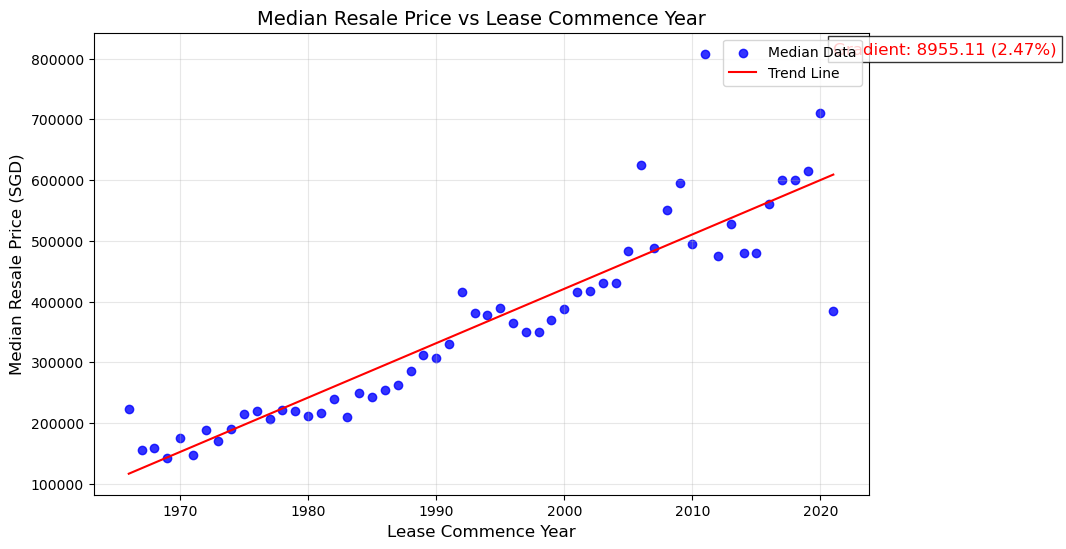

In [34]:

# Calculate the median resale price for each range_numeric
median_prices = housing_data.groupby('lease_commence_date')['resale_price'].median()

# Extract the data for plotting
x = median_prices.index  # range_numeric values
y = median_prices.values  # Median resale prices

# Initialize the figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Scatter plot for median data
ax.scatter(x, y, alpha=0.8, color='blue', label='Median Data')

# Add a trend line using linear regression
z = np.polyfit(x, y, 1)  # Degree 1 for linear fit
p = np.poly1d(z)
ax.plot(x, p(x), color='red', label='Trend Line')
# Calculate the gradient as a percentage
slope = z[0]
percent_gradient = (slope / y.mean()) * 100

# Annotate the plot with the gradient as percentage
plt.text(x.max(), y.max(), f'Gradient: {slope:.2f} ({percent_gradient:.2f}%)', 
         fontsize=12, color='red', bbox=dict(facecolor='white', alpha=0.8))

# Add labels and title
ax.set_title('Median Resale Price vs Lease Commence Year', fontsize=14)
ax.set_xlabel('Lease Commence Year', fontsize=12)
ax.set_ylabel('Median Resale Price (SGD)', fontsize=12)
ax.legend(fontsize=10)
plt.grid(alpha=0.3)

# Show the plot
plt.show()



In [ ]:
#Median Resale Price against Year of Sale

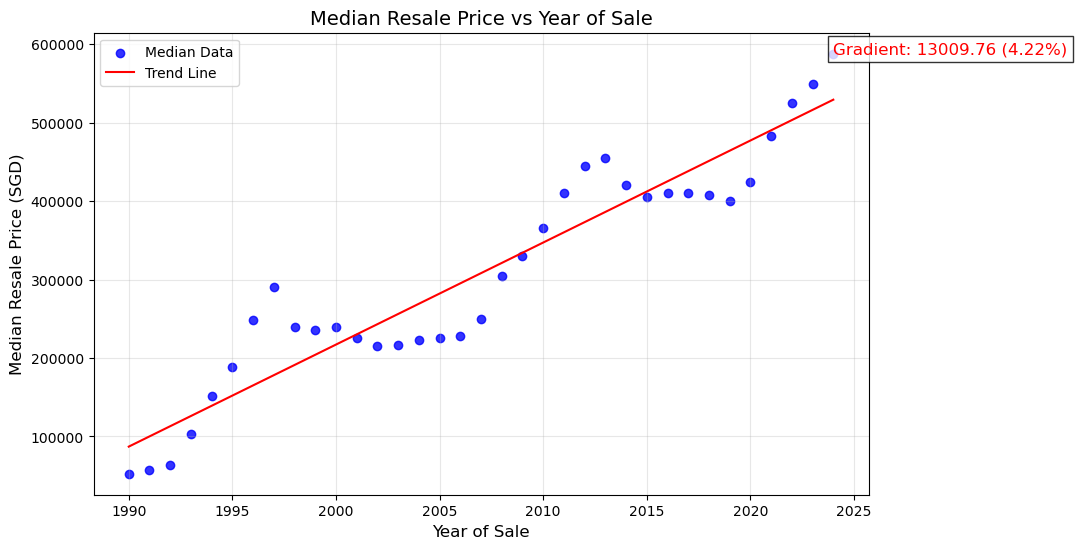

In [33]:

# Calculate the median resale price for each range_numeric
median_prices = housing_data.groupby('year')['resale_price'].median()

# Extract the data for plotting
x = median_prices.index  # range_numeric values
y = median_prices.values  # Median resale prices

# Initialize the figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Scatter plot for median data
ax.scatter(x, y, alpha=0.8, color='blue', label='Median Data')

# Add a trend line using linear regression
z = np.polyfit(x, y, 1)  # Degree 1 for linear fit
p = np.poly1d(z)
ax.plot(x, p(x), color='red', label='Trend Line')
# Calculate the gradient as a percentage
slope = z[0]
percent_gradient = (slope / y.mean()) * 100

# Annotate the plot with the gradient as percentage
plt.text(x.max(), y.max(), f'Gradient: {slope:.2f} ({percent_gradient:.2f}%)', 
         fontsize=12, color='red', bbox=dict(facecolor='white', alpha=0.8))

# Add labels and title
ax.set_title('Median Resale Price vs Year of Sale', fontsize=14)
ax.set_xlabel('Year of Sale', fontsize=12)
ax.set_ylabel('Median Resale Price (SGD)', fontsize=12)
ax.legend(fontsize=10)
plt.grid(alpha=0.3)

# Show the plot
plt.show()



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


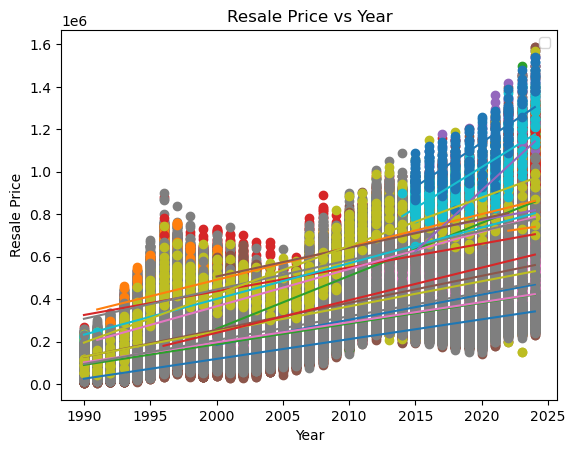

In [70]:
grouped_data = housing_data.groupby('flat_model')['resale_price'].median()
categories = grouped_data.index.tolist()
fig, ax = plt.subplots()
for category in categories:
    x = housing_data[housing_data['flat_model'] == category]['year']
    y = housing_data[housing_data['flat_model'] == category]['resale_price']
    ax.scatter(x, y)
    z = np.polyfit(x.astype(int), y, 1)
    p = np.poly1d(z)
    ax.plot(x, p(x.astype(int)))
ax.set_title('Resale Price vs Year')
ax.set_xlabel('Year')
ax.set_ylabel('Resale Price')
ax.legend()
plt.show()

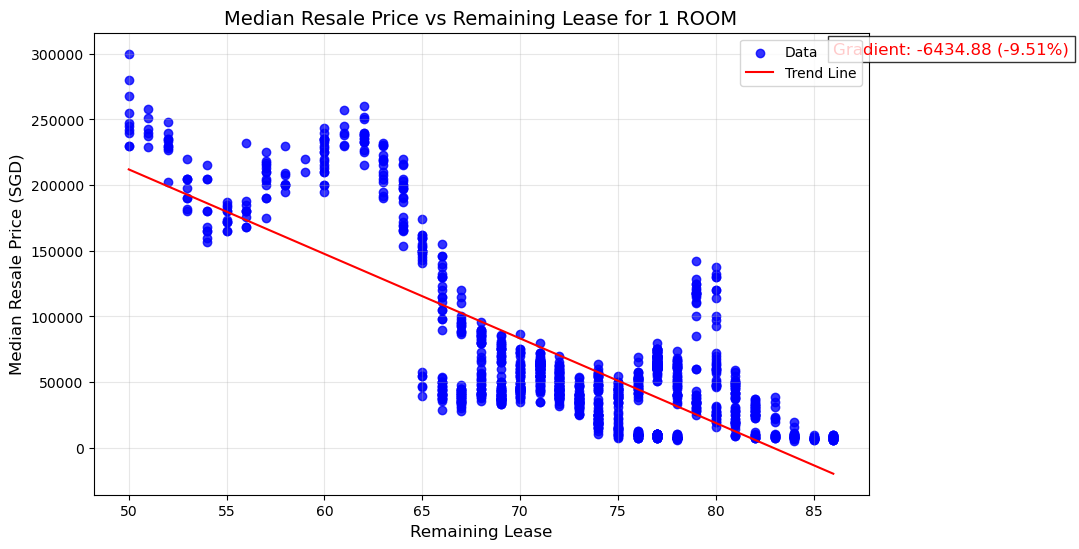

TypeError: expected non-empty vector for x

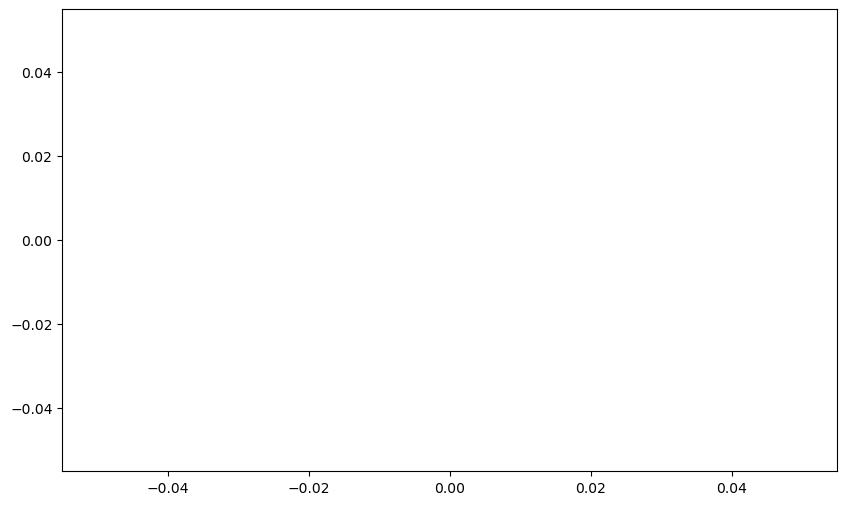

In [13]:

# Read the CSV file
df = pd.read_csv('housing_new.csv')

# Display the unique values in the 'flat_type' column
unique_flat_types = df['flat_type'].unique()

# Create a separate scatter plot for each flat_type
for flat_type in unique_flat_types:
    # Filter the DataFrame for the current flat_type
    df = df[df['flat_type'] == flat_type]
    
    # Initialize the figure and axes
    fig, ax = plt.subplots(figsize=(10, 6))
    
    # Scatter plot for the current flat_type
    ax.scatter(df['remaining_lease'], df['resale_price'], alpha=0.8, color='blue', label='Data')
    
    # Add a trend line using linear regression
    z = np.polyfit(df['remaining_lease'], df['resale_price'], 1)  # Degree 1 for linear fit
    p = np.poly1d(z)
    ax.plot(df['remaining_lease'], p(df['remaining_lease']), color='red', label='Trend Line')
    
    # Calculate the gradient as a percentage
    slope = z[0]
    percent_gradient = (slope / df['resale_price'].mean()) * 100
    
    # Annotate the plot with the gradient as percentage
    plt.text(df['remaining_lease'].max(), df['resale_price'].max(), f'Gradient: {slope:.2f} ({percent_gradient:.2f}%)',
             fontsize=12, color='red', bbox=dict(facecolor='white', alpha=0.8))
    
    # Add labels and title
    ax.set_title(f' Resale Price vs Remaining Lease for {flat_type}', fontsize=14)
    ax.set_xlabel('Remaining Lease', fontsize=12)
    ax.set_ylabel('Median Resale Price (SGD)', fontsize=12)
    ax.legend(fontsize=10)
    plt.grid(alpha=0.3)
    
    # Show the plot
    plt.show()

In [ ]:
#Visualising a new dataset after first round of training data

In [3]:

housing_data = pd.read_csv('housing_all.csv')

In [18]:
housing_data.columns


Index(['Unnamed: 0', 'year', 'month', 'town', 'flat_type', 'storey_range',
       'floor_area_sqm', 'flat_model', 'lease_commence_date',
       'remaining_lease', 'resale_price', 'district', 'range_numeric'],
      dtype='object')

In [ ]:
#Dropping irrelevant and columns with low to none importance

In [4]:
housing_data = housing_data.drop(columns=['Unnamed: 0','month', 'flat_model','town','storey_range'])
housing_data.head()


,year,flat_type,floor_area_sqm,lease_commence_date,remaining_lease,resale_price,district,range_numeric
0,1990,1 ROOM,31.0,1977,86,9000.0,North-East,11.0
1,1990,1 ROOM,31.0,1977,86,6000.0,North-East,5.0
2,1990,1 ROOM,31.0,1977,86,8000.0,North-East,11.0
3,1990,1 ROOM,31.0,1977,86,6000.0,North-East,8.0
4,1990,3 ROOM,73.0,1976,85,47200.0,North-East,5.0


In [ ]:
#Reordering the data for encoding and standardizing

In [5]:
columns_order = ['year', 'flat_type', 'district', 'floor_area_sqm', 'range_numeric', 'lease_commence_date', 'remaining_lease', 'resale_price']
housing_data = housing_data[columns_order]


In [6]:
housing_data.head()

,year,flat_type,district,floor_area_sqm,range_numeric,lease_commence_date,remaining_lease,resale_price
0,1990,1 ROOM,North-East,31.0,11.0,1977,86,9000.0
1,1990,1 ROOM,North-East,31.0,5.0,1977,86,6000.0
2,1990,1 ROOM,North-East,31.0,11.0,1977,86,8000.0
3,1990,1 ROOM,North-East,31.0,8.0,1977,86,6000.0
4,1990,3 ROOM,North-East,73.0,5.0,1976,85,47200.0


In [7]:

# Step 1: Select the categorical columns to encode
categorical_columns = [ 'flat_type', 'district']

# Step 2: Perform One-Hot Encoding using pd.get_dummies
housing_data_encoded = pd.get_dummies(housing_data, columns=categorical_columns, drop_first=True)

# Step 3: Display the first few rows of the encoded DataFrame
print(housing_data_encoded.head())
housing_data_encoded.to_csv('housing_all_encoded.csv')


   year  floor_area_sqm  range_numeric  lease_commence_date  remaining_lease  \
0  1990            31.0           11.0                 1977               86   
1  1990            31.0            5.0                 1977               86   
2  1990            31.0           11.0                 1977               86   
3  1990            31.0            8.0                 1977               86   
4  1990            73.0            5.0                 1976               85   

   resale_price  flat_type_2 ROOM  flat_type_3 ROOM  flat_type_4 ROOM  \
0        9000.0             False             False             False   
1        6000.0             False             False             False   
2        8000.0             False             False             False   
3        6000.0             False             False             False   
4       47200.0             False              True             False   

   flat_type_5 ROOM  flat_type_EXECUTIVE  flat_type_MULTI-GENERATION  \
0       

In [8]:

from sklearn.preprocessing import StandardScaler
housing_data_encoded = pd.read_csv('housing_all_encoded.csv')
# Identify columns for normalization
columns_to_normalize = ['floor_area_sqm', 'remaining_lease', 'range_numeric']

# Apply StandardScaler
scaler = StandardScaler()
housing_data_encoded[columns_to_normalize] = scaler.fit_transform(housing_data_encoded[columns_to_normalize])

# Check the transformed data
print(housing_data_encoded[columns_to_normalize].head())
housing_data_encoded.to_csv('housing_all_encoded.csv')


   floor_area_sqm  remaining_lease  range_numeric
0       -2.506989         0.463430       0.680780
1       -2.506989         0.463430      -0.558727
2       -2.506989         0.463430       0.680780
3       -2.506989         0.463430       0.061026
4       -0.879230         0.371238      -0.558727


In [9]:
housing_data_encoded = pd.read_csv('housing_all_encoded.csv')
housing_data_encoded = housing_data_encoded.drop(columns=['Unnamed: 0.1','Unnamed: 0'])
housing_data_encoded.head()

,year,floor_area_sqm,range_numeric,lease_commence_date,remaining_lease,resale_price,flat_type_2 ROOM,flat_type_3 ROOM,flat_type_4 ROOM,flat_type_5 ROOM,flat_type_EXECUTIVE,flat_type_MULTI-GENERATION,district_East,district_North,district_North-East,district_West
0,1990,-2.506989,0.680780,1977,0.463430,9000.0,False,False,False,False,False,False,False,False,True,False
1,1990,-2.506989,-0.558727,1977,0.463430,6000.0,False,False,False,False,False,False,False,False,True,False
2,1990,-2.506989,0.680780,1977,0.463430,8000.0,False,False,False,False,False,False,False,False,True,False
3,1990,-2.506989,0.061026,1977,0.463430,6000.0,False,False,False,False,False,False,False,False,True,False
4,1990,-0.879230,-0.558727,1976,0.371238,47200.0,False,True,False,False,False,False,False,False,True,False


In [10]:
housing_data_encoded.to_csv('housing_all_encoded.csv')

In [12]:
housing_new = pd.read_csv('dataset/housing_new.csv')


In [ ]:
#Correlation Matrix after standardization

Correlation Matrix:
                     range_numeric  lease_commence_date  floor_area_sqm  \
range_numeric             1.000000             0.181523        0.082495   
lease_commence_date       0.181523             1.000000        0.407163   
floor_area_sqm            0.082495             0.407163        1.000000   
resale_price              0.289063             0.563713        0.498670   

                     resale_price  
range_numeric            0.289063  
lease_commence_date      0.563713  
floor_area_sqm           0.498670  
resale_price             1.000000  


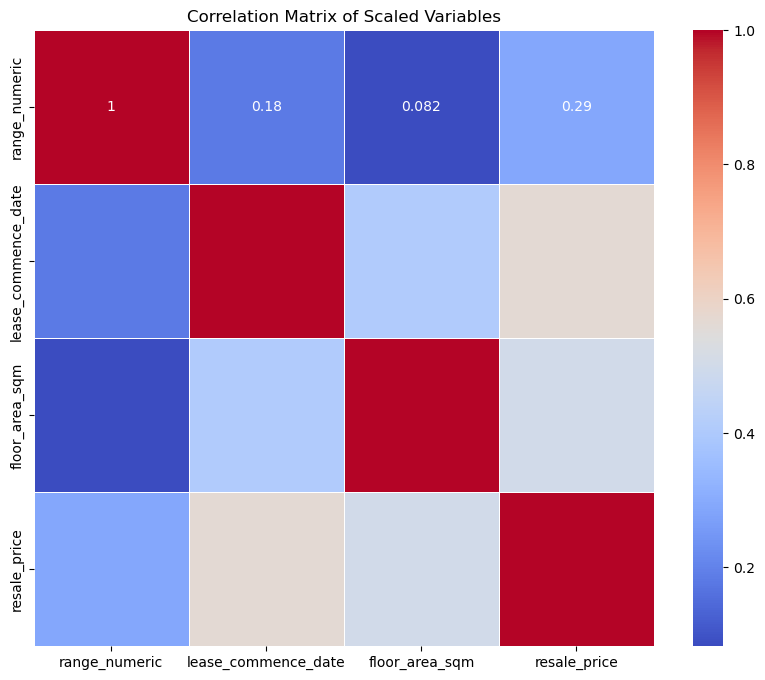

In [13]:
# Select relevant columns for correlation
selected_columns = ['range_numeric','lease_commence_date' ,'floor_area_sqm', 'resale_price']

# Scale the data by the median of 'resale_price'
scaled_data = housing_new[selected_columns].copy()
resale_price_median = housing_new['resale_price'].median()
scaled_data = scaled_data / resale_price_median

# Compute the correlation matrix for scaled data
correlation_matrix = scaled_data.corr()

# Print the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Scaled Variables')
plt.show()